<a href="https://colab.research.google.com/github/Shrsh/LSTM_and_RNN_Experiments/blob/master/Deep_Learning_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from collections import namedtuple
from itertools import count
from PIL import Image
from sklearn.metrics import r2_score

import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)
import random
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model

1 Physical GPUs, 1 Logical GPUs


#RNN for Autoregressive Model

Generate samples of an Auto Regressive model
of the form
X(t) = $a_{1}$X(t − 1) + $a_2$X(t − 2) + $a_3$X(t − 3) + U(t)

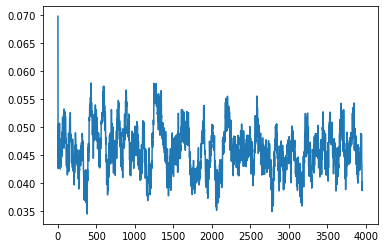

In [2]:
def moving_average(a, n=50) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

def convertToMatrix(data, step):
  X, Y =[], []
  for i in range(len(data)-step):
    d=i+step  
    X.append(data[i:d,])
    Y.append(data[d,])
  return np.array(X), np.array(Y)

def prepare_for_RNN(X,step=3):
  #preparing data for RNN, arranging data in step 

  train = np.array(X[0:1999])
  test = np.array(X[2000:3999])

  # convert into dataset matrix
  # add step elements into train and test
  test = np.append(test,np.repeat(test[-1,],step))
  train = np.append(train,np.repeat(train[-1,],step))
  trainX,trainY =convertToMatrix(train,step)
  testX,testY =convertToMatrix(test,step)

  trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
  testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
  return trainX,trainY,testX,testY



X = []
# auto regressive sequence parameters
a1 = 0.6
a2 = -0.5
a3 = -0.2
#defining initial values
X.append(1)
X.append(0.1)
X.append(0.3)
step = 15

for i in range(4000):
    X.append(a1*X[-1] + a2*X[-2] + a3*X[-3] + random.uniform(0, 0.1))
sequence_data = np.array(X)
#Approximate plotting the moving averages of the sequences
plt.plot(moving_average(sequence_data))
plt.show()
trainX,trainY,testX,testY = prepare_for_RNN(X,step=5)

Model for RNN - 1 Hidden Layer

63/63 - 0s - loss: 8.5566e-04 - mse: 8.5566e-04 - mae: 0.0252
(1999, 1, 1)
R-sqaure : 0.5622217271458088
MSE : 0.0008556584944017231
MAE : 0.02522021345794201


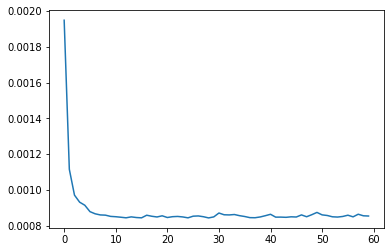

In [3]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.SimpleRNN(
    step*5, activation='tanh',return_sequences=True))
model.add(tf.keras.layers.Dense(1))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['mse','mae'])

history_track = model.fit(trainX, trainY, epochs=60,batch_size=128, verbose=0)
prediction= model.predict(testX)
metrics = model.evaluate(testX, testY, verbose=2)
print(prediction.shape)
print("R-sqaure : " + str(r2_score(testY,prediction.flatten())))
print("MSE : " + str(metrics[1]))
print("MAE : " + str(metrics[2]))

plt.plot(history_track.history['loss'])
plt.show() 

RNN with 2 Hidden Layers 


63/63 - 0s - loss: 9.7309e-04 - mse: 9.7309e-04 - mae: 0.0264
R-sqaure : 0.5021395471633925
MSE : 0.0009730918682180345
MAE : 0.026350874453783035


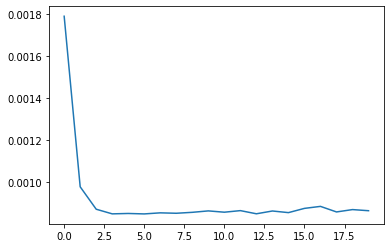

In [4]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.SimpleRNN(
    step*5, activation='tanh',return_sequences=True))
model.add(tf.keras.layers.SimpleRNN(
    step*5, activation='tanh',return_sequences=True))
model.add(tf.keras.layers.Dense(1))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['mse','mae'])

history_track = model.fit(trainX, trainY, epochs=20,batch_size=128, verbose=0)
prediction= model.predict(testX)
metrics = model.evaluate(testX, testY, verbose=2)
print("R-sqaure : " + str(r2_score(testY,prediction.flatten())))
print("MSE : " + str(metrics[1]))
print("MAE : " + str(metrics[2]))

plt.plot(history_track.history['loss'])
plt.show() 

RNN with 3 hidden layers

63/63 - 0s - loss: 8.5209e-04 - mse: 8.5209e-04 - mae: 0.0252
R-sqaure : 0.5640470428300568
MSE : 0.0008520908304490149
MAE : 0.025203214958310127


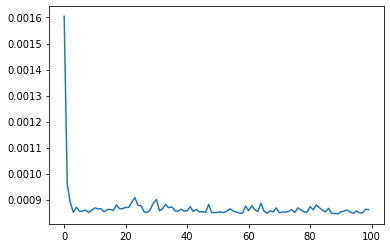

In [5]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.SimpleRNN(
    step*5, activation='tanh',return_sequences=True))
model.add(tf.keras.layers.SimpleRNN(
    step*5, activation='tanh',return_sequences=True))
model.add(tf.keras.layers.SimpleRNN(
    step*5, activation='tanh',return_sequences=True))
model.add(tf.keras.layers.Dense(1))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['mse','mae'])

history_track = model.fit(trainX, trainY, epochs=100,batch_size=128, verbose=0)
prediction= model.predict(testX)
metrics = model.evaluate(testX, testY, verbose=2)
print("R-sqaure : " + str(r2_score(testY,prediction.flatten())))
print("MSE : " + str(metrics[1]))
print("MAE : " + str(metrics[2]))
plt.plot(history_track.history['loss'])
plt.show() 

# RNN For Moving Average Models

Dataset Creation

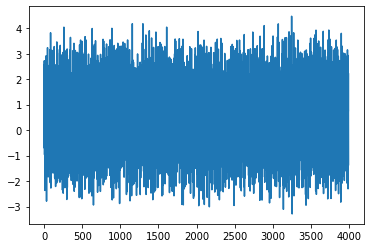

In [6]:
#Moving Average Model Parameters
a1 = 5
a2 = a3 = a4 = a5 = -1

values_from_uniform_distribution  = [random.uniform(0,1) for i in range(4000) ]
data = np.convolve(np.array(values_from_uniform_distribution), [a1,a2,a3,a4,a5], mode='valid')
plt.plot(data)
plt.show()
step = 15
trainX,trainY,testX,testY = prepare_for_RNN(data,step)

Model Training and Prediction

RNN with 1 Hidden Layer

63/63 - 0s - loss: 2.3388 - mse: 2.3388 - mae: 1.3012
R-sqaure : 0.03228673022986317
MSE : 2.338783025741577
MAE : 1.3012216091156006


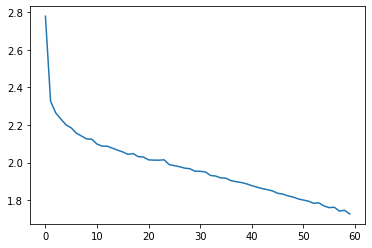

In [7]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.SimpleRNN(
    step*10, activation='tanh',return_sequences=True))
model.add(tf.keras.layers.Dense(1))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['mse','mae'])

history_track = model.fit(trainX, trainY, epochs=60,batch_size=128, verbose=0)
prediction= model.predict(testX)
metrics = model.evaluate(testX, testY, verbose=2)
print("R-sqaure : " + str(r2_score(testY,prediction.flatten())))
print("MSE : " + str(metrics[1]))
print("MAE : " + str(metrics[2]))

plt.plot(history_track.history['loss'])
plt.show() 

RNN with 2 hidden layers

63/63 - 0s - loss: 2.8095 - mse: 2.8095 - mae: 1.3877
R-sqaure : -0.16249629531361554
MSE : 2.809537172317505
MAE : 1.387712001800537


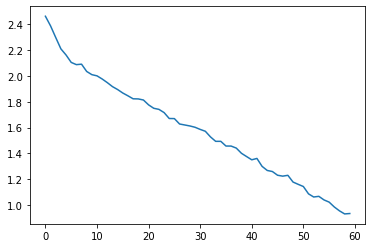

In [8]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.SimpleRNN(
    step*10, activation='tanh',return_sequences=True))
model.add(tf.keras.layers.SimpleRNN(
    step*10, activation='tanh',return_sequences=True))
model.add(tf.keras.layers.Dense(1))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['mse','mae'])

history_track = model.fit(trainX, trainY, epochs=60,batch_size=128, verbose=0)
prediction= model.predict(testX)
metrics = model.evaluate(testX, testY, verbose=2)
print("R-sqaure : " + str(r2_score(testY,prediction.flatten())))
print("MSE : " + str(metrics[1]))
print("MAE : " + str(metrics[2]))

plt.plot(history_track.history['loss'])
plt.show() 

RNN with 3 hidden layers

63/63 - 0s - loss: 2.2773 - mse: 2.2773 - mae: 1.2858
R-sqaure : 0.05773543685798277
MSE : 2.2772789001464844
MAE : 1.2857763767242432


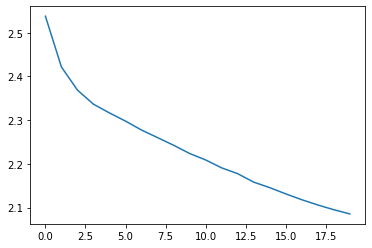

In [9]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.SimpleRNN(
    step, activation='tanh',return_sequences=True))
model.add(tf.keras.layers.SimpleRNN(
    step, activation='tanh',return_sequences=True))
model.add(tf.keras.layers.SimpleRNN(
    step, activation='tanh',return_sequences=True))
model.add(tf.keras.layers.Dense(1))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['mse','mae'])

history_track = model.fit(trainX, trainY, epochs=20,batch_size=128, verbose=0)
prediction= model.predict(testX)
metrics = model.evaluate(testX, testY, verbose=2)
print("R-sqaure : " + str(r2_score(testY,prediction.flatten())))

print("MSE : " + str(metrics[1]))
print("MAE : " + str(metrics[2]))

plt.plot(history_track.history['loss'])
plt.show() 

# Detecting Temporal Order. 

Creating dataset 

In [10]:
def create_dataset():
  seq = []
  labels = []
  for i in range(4000):
    seq_len = random.randint(100, 110)
    t1 = random.randint(10,20)
    t2 = random.randint(33,43)
    t3 = random.randint(66,76)
    sequence = ""
    order = ""
    label = ""
    for i in range(seq_len):
      if i == 0:
        sequence+="E"
      elif i == seq_len - 1:
        sequence+="B"
      elif i == t1 or i == t2 or i == t3:
        temp = random.choice(['X','Y'])
        order+=temp
        sequence+=temp
      else:
        sequence+=random.choice(['a','b','c','d'])
    if order == "XXX":
          label+="Q"
    if order == "XXY":
        label+="R"
    if order == "XYX":
        label+="S"
    if order == "XYY":
        label+="U"
    if order == "YXX":
        label+="V"
    if order == "YXY":
        label+="A"
    if order == "YYX":
        label+="B"
    if order == "YYY":
        label+="C"
    seq.append(np.array(list(sequence)))
    labels.append(list(label))
  return np.array(seq), np.array(labels)

seq, labels = create_dataset()
#one hot encoding
def encoding_sequence(seq):
  sequence = []
  for x in seq:
    y = []
    for i in range(len(x)):    
      if x[i] == "E" or x[i] == "B":
        y.append(int(1))
      elif x[i] == 'X':
        y.append(int(2))
      elif x[i] == 'Y':
        y.append(int(3))
      else:
        y.append(int(4))
    sequence.append(y)
  return sequence

seq = encoding_sequence(seq)
padded_inputs = tf.keras.preprocessing.sequence.pad_sequences(seq,
                                                              padding='post')
#one-hot encoding
from keras.utils import to_categorical
encoded_data = [to_categorical(i) for i in padded_inputs]
encoded_data = np.reshape(np.array(encoded_data),(4000,5,110))
print(encoded_data.shape)
# encoded_data = np.reshape(encoded_data,(4000,5,110))
#label encoder
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(labels)
encoded_labels = le.transform(labels)
depth = 8
encoded_labels = tf.one_hot(encoded_labels, depth,
           on_value=1.0, off_value=0.0,
           axis=-1)
encoded_labels = np.reshape(encoded_labels, (4000,8))
print(encoded_labels.shape)

Using TensorFlow backend.


(4000, 5, 110)
(4000, 8)


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LSTM Model 

In [12]:
#test train split 
trainX = encoded_data[0:3000]
testX = encoded_data[3000:3999]
trainY = encoded_labels[0:3000]
testY = encoded_labels[3000:3999]

model = tf.keras.Sequential([
    tf.keras.layers.LSTM(2,return_sequences=True),
    tf.keras.layers.LSTM(4,return_sequences=True),
    tf.keras.layers.LSTM(8,return_sequences=False),
    tf.keras.layers.Dense(8, activation='softmax')])

# model.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-07), metrics=['accuracy'])
# model.fit(trainX,trainY, epochs=50, batch_size=1,verbose=1)

#testing and accuracy 
# predictions = model.predict(testX)
# from numpy import linalg as LA
# def accuracy(predictions, labels):
#     count = 0 
#     diff = predictions - labels
#     for i in range(predictions.shape[0]):
#       if LA.norm(diff[i,:],1) < 0.3:
#         count+=1
#     return count/predictions.shape[0]
# print(accuracy(predictions,testY))


Epoch 1/50
1236/3000 [===========>..................] - ETA: 12s - loss: 2.1608 - accuracy: 0.1108

KeyboardInterrupt: ignored

In [0]:
from numpy import linalg as LA

def loss(model, x, y, training):
  # training=training is needed only if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  y_ = model(x, training=training)
  return loss_object(y_true=y, y_pred=y_)

def grad(model, inputs, targets):
  with tf.GradientTape() as tape:
    loss_value = loss(model, inputs, targets, training=True)
  return loss_value, tape.gradient(loss_value, model.trainable_variables)

loss_object = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

# Keep results for plotting
train_loss_results = []
train_accuracy_results = []
av_training_error = 0
num_epochs = 0

while True:
  num_epochs+=1
  epoch_loss_avg = tf.keras.metrics.Mean()
  # Training loop - using batches of 32
  for i in range(encoded_data.shape[0]):
    # Optimize the model
    x = np.reshape(encoded_data[i],(1,5,110))
    y = np.reshape(encoded_labels[i], (1,8))
    loss_value, grads = grad(model,x, y)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))
    predictions = model.predict(x)
    av_training_error+= (LA.norm(predictions - encoded_labels[i], 1) - av_training_error)/num_epochs
    # Track progress
    epoch_loss_avg.update_state(loss_value)
  # End epoch
  train_loss_results.append(epoch_loss_avg.result())

  if num_epochs % 2 == 0:
    print("Epoch {:03d}: Loss: {:.3f}, Performance_Metric: {:.3%}".format(num_epochs,
                                                                epoch_loss_avg.result(),av_training_error))
  if av_training_error < 0.1:
    break